## Step 1: Import Library

In [1]:
from presentation import *
import numpy as np

## Step 2: Parameterize Image as a Closed-Loop Function

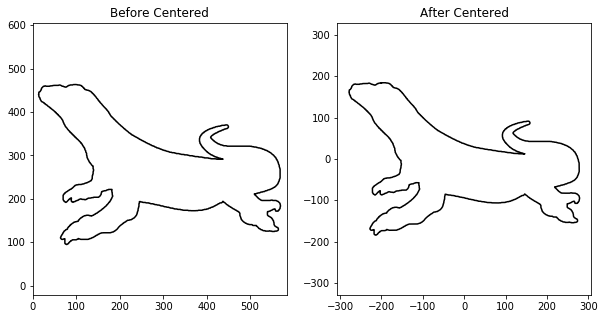

In [2]:
time_table, x_table, y_table = create_close_loop('komodo.jpg')

## Step 3: Calculate Discrete Fourier Transform Coefficient

In [6]:
order = 30 # We need higher order approximation to get better approximation
coef = coef_list(time_table, x_table, y_table, order)
print(coef)

[[ 2.88375735e-01  1.67388795e-01]
 [ 3.98891535e-01  2.85830655e-01]
 [ 5.29668037e-01  2.03843944e-01]
 [-4.60932884e-01 -1.89576307e-01]
 [-4.56091207e-01 -3.05401909e-01]
 [ 7.60034836e-01 -1.63518232e-01]
 [-4.73508171e-01  7.66146290e-01]
 [ 2.85064045e-01 -1.03335101e+00]
 [ 1.50938381e-01  8.27606141e-01]
 [-2.40566002e-01  8.85121371e-02]
 [ 1.22556931e+00  4.57073421e-01]
 [-1.86333576e+00 -5.85286371e-01]
 [ 5.84810441e-01 -1.61770508e+00]
 [ 1.33674236e+00  2.14429939e+00]
 [ 5.63125288e-01  1.29879981e+00]
 [-7.61696330e-01 -9.10209033e-01]
 [-9.32522911e-02 -6.26643704e-01]
 [ 2.71708127e+00 -2.10934621e+00]
 [ 1.04297635e+00  1.20442642e+00]
 [-9.92461593e-01 -2.07117903e+00]
 [-1.67762650e+00 -5.03004218e-01]
 [ 1.04363050e+00  5.01293391e+00]
 [ 2.80591071e+00  5.61577511e-01]
 [ 3.11738369e+00 -1.30720820e+01]
 [ 8.00735328e-01 -5.03826433e+00]
 [-7.19179668e+00  7.38805819e+00]
 [ 1.61038556e+00  1.27508940e+01]
 [-3.55828930e+01 -1.83757245e+00]
 [-1.05048835e+01  3

## Step 4: Evaluate Fourier Transform

In [8]:
space = np.linspace(0, tau, 300) # Did you know what tau is ? Check my previous video about it ! :D
x_DFT = [DFT(t, coef, order)[0] for t in space]
y_DFT = [DFT(t, coef, order)[1] for t in space]

## Step 5: Visualize it

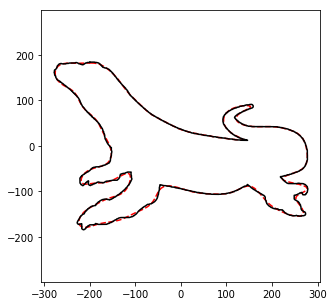

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_DFT, y_DFT, 'r--')
ax.plot(x_table, y_table, 'k-')
ax.set_aspect('equal', 'datalim')
xmin, xmax = xlim()
ymin, ymax = ylim()

## Step 6: Create Epicycle Animation

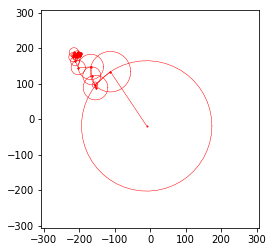

In [10]:
anim = visualize(x_DFT, y_DFT, coef, order, space, [xmin, xmax, ymin, ymax])
Writer = animation.writers['html']
writer = Writer(fps=60)
anim.save('komodo.html',writer=writer, dpi=150)